In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras as keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, ZeroPadding2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [9]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

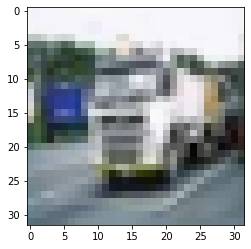

In [389]:
img = plt.imshow(X_train[1000])

In [277]:
# Normalize training and test set

X_train = X_train/255
X_test = X_test/255

In [247]:
# Convert to one-hot encoding for easier processing

from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

### Model  1 - CNN from the ground-up  - Accuracy:  0.639

In [259]:
model_1 = models.Sequential([
    # Convolutional base layer
    InputLayer(input_shape=X_train.shape[1:]),
    Conv2D(filters =45, kernel_size = (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(filters =70, kernel_size = (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    # Dense layers 
    Flatten(),
    Dense(750, activation='relu'),
    Dropout(0.3),
    Dense(500, activation='relu'), 
    Dropout(0.20),
    Dense(10, activation='softmax')
])

In [260]:
model_1.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 45)        1260      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 45)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 70)        28420     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 70)          0         
_________________________________________________________________
flatten_51 (Flatten)         (None, 2520)              0         
_________________________________________________________________
dense_188 (Dense)            (None, 750)               1890750   
_________________________________________________________________
dropout_92 (Dropout)         (None, 750)             

In [261]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [262]:
history_1 = model_1.fit(X_train, y_train, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 47s 30ms/step - loss: 2.1632 - accuracy: 0.2699
Epoch 2/25
1563/1563 [==============================] - 48s 31ms/step - loss: 1.5075 - accuracy: 0.4610
Epoch 3/25
1563/1563 [==============================] - 47s 30ms/step - loss: 1.2857 - accuracy: 0.5501
Epoch 4/25
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1553 - accuracy: 0.5987
Epoch 5/25
1563/1563 [==============================] - 48s 31ms/step - loss: 1.0552 - accuracy: 0.6340
Epoch 6/25
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9651 - accuracy: 0.6685
Epoch 7/25
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8905 - accuracy: 0.6939
Epoch 8/25
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8070 - accuracy: 0.7245
Epoch 9/25
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7381 - accuracy: 0.7498
Epoch 10/25
1563/1563 [==============================] - 48s 31m

In [263]:
model_1.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 1.4550 - accuracy: 0.6398


[1.455003023147583, 0.6398000121116638]

### Model 2  Transfer Learning with MobileNet(Froze Base) - Accuracy:  0.224

In [336]:
from keras.applications import mobilenet_v2
from keras.applications import MobileNet

In [252]:
from tensorflow.keras.models import Model

base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3), classes=y_train.shape[1])    
    

for layer in base_model.layers:
    layer.trainable = False    


# Establish new fully connected block
x = base_model.output
x = Dropout(0.5)(x)
x = Flatten()(x) # flatten from convolution tensor output 
x = Dense(500, activation='relu')(x) # number of layers and units are hyperparameters, as usual
x = Dropout(.30)(x)
x = Dense(250, activation='relu')(x)
x = Dropout(.20)(x)
x = Dense(125, activation='relu')(x)
x = Dropout(.10)(x)
predictions = Dense(10, activation='softmax')(x) # should match # of classes predicted

# define formal model object to train and compile it as usual
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [351]:
model.summary()

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_65 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         input_65[0][0]                   
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 16, 16, 32)   0           bn_Conv1[0][0]                   
___________________________________________________________________________________________

In [253]:
history_2 = model.fit(X_train, y_train_one_hot, batch_size = 100, epochs = 25, 
                 validation_split = 0.25)

Epoch 1/25
375/375 [==============================] - 24s 60ms/step - loss: 2.2166 - accuracy: 0.1649 - val_loss: 2.1496 - val_accuracy: 0.2189
Epoch 2/25
375/375 [==============================] - 23s 62ms/step - loss: 2.1897 - accuracy: 0.1783 - val_loss: 2.1403 - val_accuracy: 0.2194
Epoch 3/25
375/375 [==============================] - 23s 62ms/step - loss: 2.1849 - accuracy: 0.1801 - val_loss: 2.1361 - val_accuracy: 0.2215
Epoch 4/25
375/375 [==============================] - 23s 63ms/step - loss: 2.1754 - accuracy: 0.1863 - val_loss: 2.1262 - val_accuracy: 0.2190
Epoch 5/25
375/375 [==============================] - 23s 62ms/step - loss: 2.1712 - accuracy: 0.1888 - val_loss: 2.1187 - val_accuracy: 0.2146
Epoch 6/25
375/375 [==============================] - 23s 61ms/step - loss: 2.1735 - accuracy: 0.1870 - val_loss: 2.1377 - val_accuracy: 0.2184
Epoch 7/25
375/375 [==============================] - 23s 62ms/step - loss: 2.1681 - accuracy: 0.1891 - val_loss: 2.1336 - val_accuracy:

In [254]:
model.evaluate(X_test, y_test_one_hot)[1]

313/313 [==============================] - 7s 20ms/step - loss: 2.1094 - accuracy: 0.2240


0.2240000069141388

### Model 3 Transfer Learning with MobileNet(Frozen Base) - Accuracy:  0.224

In [265]:
base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3), classes=y_train.shape[1])    
for layer in base_model.layers:
    layer.trainable = False  
    
model_2 = Sequential(
                        [InputLayer(input_shape=X_train.shape[1:]),
                         #ZeroPadding2D(padding=1.5),
                         base_model,
                         Dropout(0.50),
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(250, activation='relu'),
                         Dropout(.3),
                         Dense(125, activation = 'relu'),
                         Dropout(.2),
                         Dense(10, activation='softmax')]
                       )
    
model_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [266]:
NN_transfer.fit(X_train, y_train_one_hot, batch_size=100,epochs=25,validation_split=0.25)

Epoch 1/25
375/375 [==============================] - 22s 57ms/step - loss: 2.1701 - accuracy: 0.1888 - val_loss: 2.1284 - val_accuracy: 0.2140
Epoch 2/25
375/375 [==============================] - 23s 61ms/step - loss: 2.1742 - accuracy: 0.1879 - val_loss: 2.1343 - val_accuracy: 0.2146
Epoch 3/25
375/375 [==============================] - 22s 58ms/step - loss: 2.1671 - accuracy: 0.1918 - val_loss: 2.1270 - val_accuracy: 0.2172
Epoch 4/25
375/375 [==============================] - 22s 58ms/step - loss: 2.1641 - accuracy: 0.1929 - val_loss: 2.1262 - val_accuracy: 0.2162
Epoch 5/25
375/375 [==============================] - 23s 60ms/step - loss: 2.1623 - accuracy: 0.1939 - val_loss: 2.1184 - val_accuracy: 0.2207
Epoch 6/25
375/375 [==============================] - 22s 59ms/step - loss: 2.1607 - accuracy: 0.1925 - val_loss: 2.1227 - val_accuracy: 0.2164
Epoch 7/25
375/375 [==============================] - 22s 59ms/step - loss: 2.1599 - accuracy: 0.1910 - val_loss: 2.1238 - val_accuracy:

In [267]:
model.evaluate(X_test, y_test_one_hot)[1]

313/313 [==============================] - 6s 19ms/step - loss: 2.1094 - accuracy: 0.2240


0.2240000069141388

### Model 4 MobileNet Unfrozen Base 6 Dense Layers -  Accuracy:  0.735

In [232]:
base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3), classes=y_train.shape[1]) 

model = Sequential()

model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())

#Adding the Dense Layers and Dropout
model.add(Dense(1000,activation=('relu'))) 

model.add(Dense(750,activation=('relu'))) 

model.add(Dropout(.3))

model.add(Dense(500, activation=('relu')))

model.add(Dropout(.25))

model.add(Dense(250,activation=('relu')))

model.add(Dropout(.2))

model.add(Dense(125, activation=('relu')))

model.add(Dropout(.10))

model.add(Dense(10,activation=('softmax')))
#Visualizing Model Summary

In [233]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1, 1, 1280)        2257984   
_________________________________________________________________
dropout_75 (Dropout)         (None, 1, 1, 1280)        0         
_________________________________________________________________
flatten_46 (Flatten)         (None, 1280)              0         
_________________________________________________________________
dense_169 (Dense)            (None, 1000)              1281000   
_________________________________________________________________
dense_170 (Dense)            (None, 750)               750750    
_________________________________________________________________
dropout_76 (Dropout)         (None, 750)               0         
_________________________________________________________________
dense_171 (Dense)            (None, 500)             

In [234]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])


In [235]:
history_model_D = model.fit(X_train, y_train_one_hot, batch_size = 100, epochs = 25, 
                 validation_split = 0.2)

Epoch 1/25
400/400 [==============================] - 96s 232ms/step - loss: 1.5863 - accuracy: 0.4289 - val_loss: 4.3855 - val_accuracy: 0.1579
Epoch 2/25
400/400 [==============================] - 91s 227ms/step - loss: 1.0189 - accuracy: 0.6800 - val_loss: 2.9502 - val_accuracy: 0.4023
Epoch 3/25
400/400 [==============================] - 90s 224ms/step - loss: 0.8714 - accuracy: 0.7295 - val_loss: 4.4078 - val_accuracy: 0.3283
Epoch 4/25
400/400 [==============================] - 90s 224ms/step - loss: 0.7874 - accuracy: 0.7573 - val_loss: 1.6151 - val_accuracy: 0.5957
Epoch 5/25
400/400 [==============================] - 91s 228ms/step - loss: 0.7165 - accuracy: 0.7793 - val_loss: 1.5413 - val_accuracy: 0.6626
Epoch 6/25
400/400 [==============================] - 91s 226ms/step - loss: 0.6657 - accuracy: 0.7952 - val_loss: 1.3971 - val_accuracy: 0.6779
Epoch 7/25
400/400 [==============================] - 90s 224ms/step - loss: 0.6285 - accuracy: 0.8067 - val_loss: 1.2243 - val_ac

In [237]:
model.evaluate(X_test, y_test_one_hot)[1]

313/313 [==============================] - 7s 21ms/step - loss: 1.5128 - accuracy: 0.7363


0.736299991607666

/Users/rahulraju/opt/anaconda3/envs/metis/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<AxesSubplot:>

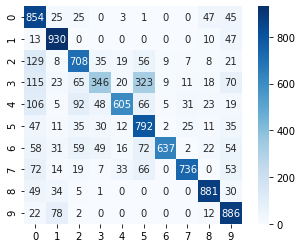

In [151]:
model_D_confusion_matrix = confusion_matrix(y_test, model.predict_classes(X_test))

sns.heatmap(model_confusion_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')

In [156]:
classes = ['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck' ]


Text(83.40000000000006, 0.5, 'Actual')

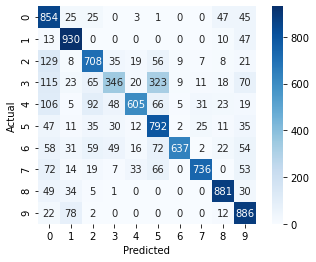

In [158]:
sns.heatmap(model_confusion_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
           #xticklabels = [classes], yticklabels=[classes])

plt.xlabel('Predicted')
plt.ylabel('Actual')


In [326]:
del model_5

### Model 5 MobileNet Unfrozen Base 5 Dense Layers -  Accuracy:  0.757

In [327]:
base_model_2 = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3), classes=y_train.shape[1]) 


# for layer in base_model_2.layers:
#     layer.trainable = False


model_5 = Sequential()

model_5.add(base_model_2)
model_5.add(Dropout(0.5))
model_5.add(Flatten())

model_5.add(Dense(750,activation=('relu'))) 

model_5.add(Dense(512, activation=('relu')))

model_5.add(Dropout(.3))

model_5.add(Dense(256,activation=('relu')))

model_5.add(Dropout(.20))

model_5.add(Dense(128,activation=('relu'))) 

model_5.add(Dropout(.1))

model_5.add(Dense(10,activation=('softmax')))


In [328]:
model_5.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1, 1, 1280)        2257984   
_________________________________________________________________
dropout_144 (Dropout)        (None, 1, 1, 1280)        0         
_________________________________________________________________
flatten_66 (Flatten)         (None, 1280)              0         
_________________________________________________________________
dense_257 (Dense)            (None, 750)               960750    
_________________________________________________________________
dense_258 (Dense)            (None, 512)               384512    
_________________________________________________________________
dropout_145 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_259 (Dense)            (None, 256)             

In [329]:
model_5.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])

In [330]:
history_5 = model_5.fit(X_train, y_train_one_hot, batch_size = 100, epochs = 25, 
                 validation_split = 0.2)

Epoch 1/25
400/400 [==============================] - 96s 227ms/step - loss: 1.4705 - accuracy: 0.4935 - val_loss: 2.1045 - val_accuracy: 0.2382
Epoch 2/25
400/400 [==============================] - 93s 232ms/step - loss: 0.9582 - accuracy: 0.6967 - val_loss: 1.5564 - val_accuracy: 0.4755
Epoch 3/25
400/400 [==============================] - 93s 232ms/step - loss: 0.8097 - accuracy: 0.7465 - val_loss: 1.6580 - val_accuracy: 0.5561
Epoch 4/25
400/400 [==============================] - 93s 233ms/step - loss: 0.7163 - accuracy: 0.7761 - val_loss: 1.2515 - val_accuracy: 0.6271
Epoch 5/25
400/400 [==============================] - 95s 238ms/step - loss: 0.6381 - accuracy: 0.8002 - val_loss: 1.2760 - val_accuracy: 0.6577
Epoch 6/25
400/400 [==============================] - 96s 240ms/step - loss: 0.5939 - accuracy: 0.8137 - val_loss: 1.6123 - val_accuracy: 0.6550
Epoch 7/25
400/400 [==============================] - 90s 226ms/step - loss: 0.5663 - accuracy: 0.8235 - val_loss: 1.8164 - val_ac

In [331]:
model_5.evaluate(X_test, y_test_one_hot)[1]

313/313 [==============================] - 8s 21ms/step - loss: 1.5909 - accuracy: 0.7193


0.7192999720573425

In [311]:
y_pred = model_5.predict(X_test)

y_pred_classes = [np.argmax(object) for object in y_pred]

print(classification_report(y_test,  y_pred_classes))

              precision    recall  f1-score   support

           0       0.92      0.46      0.61      1000
           1       0.86      0.88      0.87      1000
           2       0.61      0.76      0.68      1000
           3       0.65      0.40      0.50      1000
           4       0.58      0.76      0.66      1000
           5       0.48      0.87      0.62      1000
           6       0.90      0.67      0.77      1000
           7       0.81      0.80      0.81      1000
           8       0.85      0.85      0.85      1000
           9       0.94      0.74      0.83      1000

    accuracy                           0.72     10000
   macro avg       0.76      0.72      0.72     10000
weighted avg       0.76      0.72      0.72     10000



In [191]:
model_confusion_matrix = confusion_matrix(y_test, model_2.predict_classes(X_test))

/Users/rahulraju/opt/anaconda3/envs/metis/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(83.40000000000006, 0.5, 'Actual')

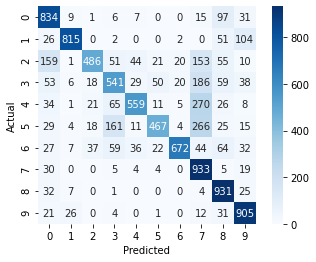

In [192]:
sns.heatmap(model_confusion_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
           #xticklabels = [classes], yticklabels=[classes])

plt.xlabel('Predicted')
plt.ylabel('Actual')


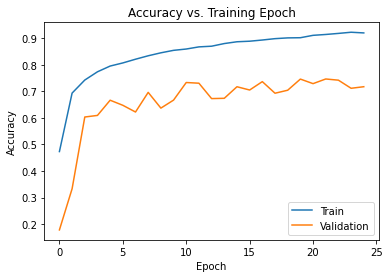

In [193]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy vs. Training Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])



In [ ]:
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

In [183]:
model_2.history['val_accuracy']

TypeError: 'History' object is not subscriptable

### Model 6 Augmented Transfer Learning - Accuracy:  0.228
#### Step 1)  Model trained with MobileNet convolutional base frozen
#### Step 2)  Output from step 1 is retrained again only using dense layers

In [217]:
base_model_3 = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3), classes=y_train.shape[1]) 


for layer in base_model_3.layers:
    layer.trainable = False


model_3 = Sequential()

model_3.add(base_model_3)
#model_3.add(Dropout(0.4))
model_3.add(Flatten())

model_3.add(Dense(512, activation=('relu')))

model_3.add(Dense(256,activation=('relu')))

model_3.add(Dropout(.3))

model_3.add(Dense(128,activation=('relu'))) 

model_3.add(Dropout(.2))

model_3.add(Dense(64, activation=('relu')))

model_3.add(Dropout(.10))

model_3.add(Dense(10,activation=('softmax')))


In [218]:
model_3.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])


In [219]:
history = model_3.fit(X_train, y_train_one_hot, batch_size = 100, epochs = 25, 
                 validation_split = 0.2)

Epoch 1/25
400/400 [==============================] - 26s 60ms/step - loss: 2.1521 - accuracy: 0.1970 - val_loss: 2.0937 - val_accuracy: 0.2243
Epoch 2/25
400/400 [==============================] - 23s 58ms/step - loss: 2.0989 - accuracy: 0.2251 - val_loss: 2.0802 - val_accuracy: 0.2311
Epoch 3/25
400/400 [==============================] - 23s 58ms/step - loss: 2.0816 - accuracy: 0.2314 - val_loss: 2.0763 - val_accuracy: 0.2361
Epoch 4/25
400/400 [==============================] - 24s 59ms/step - loss: 2.0685 - accuracy: 0.2354 - val_loss: 2.0677 - val_accuracy: 0.2380
Epoch 5/25
400/400 [==============================] - 23s 59ms/step - loss: 2.0576 - accuracy: 0.2400 - val_loss: 2.0689 - val_accuracy: 0.2380
Epoch 6/25
400/400 [==============================] - 24s 59ms/step - loss: 2.0471 - accuracy: 0.2449 - val_loss: 2.0664 - val_accuracy: 0.2360
Epoch 7/25
400/400 [==============================] - 24s 59ms/step - loss: 2.0353 - accuracy: 0.2501 - val_loss: 2.0702 - val_accuracy:

In [220]:
model_3.evaluate(X_test, y_test_one_hot)[1]

313/313 [==============================] - 7s 20ms/step - loss: 2.3590 - accuracy: 0.2306


0.2305999994277954

In [332]:
# Output from initial training is trained agained using only model dense layers

#model_3.add(base_model_3)
#model_3.add(Dropout(0.4))
model_3.add(Flatten())

model_3.add(Dense(512, activation=('relu')))

model_3.add(Dense(256,activation=('relu')))

model_3.add(Dropout(.3))

model_3.add(Dense(128,activation=('relu'))) 

model_3.add(Dropout(.2))

model_3.add(Dense(64, activation=('relu')))

model_3.add(Dropout(.10))

model_3.add(Dense(10,activation=('softmax')))
#Visualizing Model Summary

In [352]:
model_3.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1, 1, 1280)        2257984   
_________________________________________________________________
flatten_42 (Flatten)         (None, 1280)              0         
_________________________________________________________________
dense_144 (Dense)            (None, 512)               655872    
_________________________________________________________________
dense_145 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_59 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_146 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_60 (Dropout)         (None, 128)             

In [236]:
model_3.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])

In [227]:
history = model_3.fit(X_train, y_train_one_hot, batch_size = 100, epochs = 25, 
                 validation_split = 0.2)

Epoch 1/25
400/400 [==============================] - 23s 57ms/step - loss: 1.7241 - accuracy: 0.3653 - val_loss: 2.6694 - val_accuracy: 0.2228
Epoch 2/25
400/400 [==============================] - 23s 57ms/step - loss: 1.7136 - accuracy: 0.3684 - val_loss: 2.7162 - val_accuracy: 0.2281
Epoch 3/25
400/400 [==============================] - 23s 57ms/step - loss: 1.7129 - accuracy: 0.3676 - val_loss: 2.6908 - val_accuracy: 0.2284
Epoch 4/25
400/400 [==============================] - 23s 58ms/step - loss: 1.7081 - accuracy: 0.3708 - val_loss: 2.6801 - val_accuracy: 0.2264
Epoch 5/25
400/400 [==============================] - 23s 57ms/step - loss: 1.6985 - accuracy: 0.3743 - val_loss: 2.7426 - val_accuracy: 0.2241
Epoch 6/25
400/400 [==============================] - 23s 57ms/step - loss: 1.6936 - accuracy: 0.3746 - val_loss: 2.7667 - val_accuracy: 0.2256
Epoch 7/25
400/400 [==============================] - 23s 57ms/step - loss: 1.6858 - accuracy: 0.3798 - val_loss: 2.8069 - val_accuracy:

In [228]:
model_3.evaluate(X_test, y_test_one_hot)[1]

313/313 [==============================] - 6s 20ms/step - loss: 2.9646 - accuracy: 0.2286


0.22859999537467957

### Model 7: Transfer Learning with MobileNet Version 1 - Unfrozen Base
#### - 3 layers(500,250,125 nodes respectively)
#### - Dropout after each dense layer(0.3,0.2,0.1)

In [341]:
base_model_7 = MobileNet(weights='imagenet', include_top=False, input_shape=(32,32,3), classes=y_train.shape[1]) 


# for layer in base_model_7.layers:
#     layer.trainable = False


model_7 = Sequential()

model_7.add(base_model_7)
model_7.add(Dropout(0.4))
model_7.add(Flatten())

model_7.add(Dense(512, activation=('relu')))

model_7.add(Dense(256,activation=('relu')))

model_7.add(Dropout(.3))

model_7.add(Dense(128,activation=('relu'))) 

model_7.add(Dropout(.2))

model_7.add(Dense(64, activation=('relu')))

model_7.add(Dropout(.10))

model_7.add(Dense(10,activation=('softmax')))


In [342]:
model_7.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])

In [343]:
history_7 = model_7.fit(X_train, y_train_one_hot, batch_size = 100, epochs = 25, 
                 validation_split = 0.2)

Epoch 1/25
400/400 [==============================] - 141s 347ms/step - loss: 1.2847 - accuracy: 0.5648 - val_loss: 0.9559 - val_accuracy: 0.6946
Epoch 2/25
400/400 [==============================] - 138s 345ms/step - loss: 0.8384 - accuracy: 0.7362 - val_loss: 0.8442 - val_accuracy: 0.7338
Epoch 3/25
400/400 [==============================] - 140s 350ms/step - loss: 0.7072 - accuracy: 0.7774 - val_loss: 0.9395 - val_accuracy: 0.7210
Epoch 4/25
400/400 [==============================] - 142s 355ms/step - loss: 0.6281 - accuracy: 0.8055 - val_loss: 0.7493 - val_accuracy: 0.7748
Epoch 5/25
400/400 [==============================] - 143s 356ms/step - loss: 0.5499 - accuracy: 0.8265 - val_loss: 0.7223 - val_accuracy: 0.7675
Epoch 6/25
400/400 [==============================] - 138s 346ms/step - loss: 0.4962 - accuracy: 0.8475 - val_loss: 0.7685 - val_accuracy: 0.7677
Epoch 7/25
400/400 [==============================] - 138s 345ms/step - loss: 0.4535 - accuracy: 0.8603 - val_loss: 0.7341 -

In [344]:
model_7.evaluate(X_test, y_test_one_hot)[1]

313/313 [==============================] - 7s 19ms/step - loss: 0.8053 - accuracy: 0.8087


0.8087000250816345

In [353]:
y_pred = model_7.predict(X_test)

y_pred_classes = [np.argmax(object) for object in y_pred]

print(classification_report(y_test,  y_pred_classes))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.90      0.89      0.90      1000
           2       0.78      0.75      0.77      1000
           3       0.64      0.65      0.65      1000
           4       0.83      0.77      0.80      1000
           5       0.66      0.75      0.70      1000
           6       0.93      0.81      0.86      1000
           7       0.83      0.85      0.84      1000
           8       0.81      0.94      0.87      1000
           9       0.95      0.82      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [365]:
class_dict = {0: "airplane",
1: "automobile",
2: "bird",
3: "cat",
4: "deer",
5: "dog",
6: "frog",
7: "horse",
8: "ship",
9: "truck"}

In [356]:
model_confusion_matrix = confusion_matrix(y_test, model_7.predict_classes(X_test))

/Users/rahulraju/opt/anaconda3/envs/metis/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


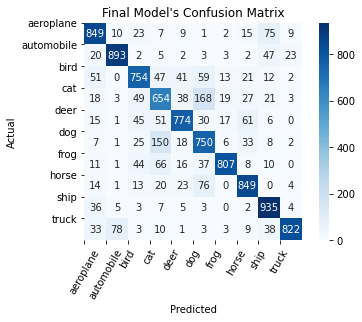

In [385]:
sns.heatmap(model_confusion_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
           #xticklabels = [classes], yticklabels=[classes])

plt.title("Final Model's Confusion Matrix")    
    
plt.xlabel('Predicted')
plt.ylabel('Actual')

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=60);
plt.yticks(tick_marks, classes, rotation = 360);

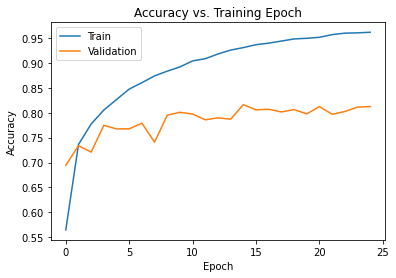

In [426]:
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])

plt.title('Accuracy vs. Training Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])

In [362]:
classes

['aeroplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### Model 7: Transfer Learning with MobileNet Version 1 - Frozen Base
#### - 3 layers(500,250,125 nodes respectively)
#### - Dropout after each dense layer(0.3,0.2,0.1)

In [347]:
base_model_8 = MobileNet(weights='imagenet', include_top=False, input_shape=(32,32,3), classes=y_train.shape[1]) 


for layer in base_model_8.layers:
    layer.trainable = False


model_8 = Sequential()

model_8.add(base_model_8)
model_8.add(Dropout(0.4))
model_8.add(Flatten())

model_8.add(Dense(512, activation=('relu')))

model_8.add(Dense(256,activation=('relu')))

model_8.add(Dropout(.3))

model_8.add(Dense(128,activation=('relu'))) 

model_8.add(Dropout(.2))

model_8.add(Dense(64, activation=('relu')))

model_8.add(Dropout(.10))

model_8.add(Dense(10,activation=('softmax')))


In [348]:
model_8.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])

In [349]:
history_8 = model_8.fit(X_train, y_train_one_hot, batch_size = 100, epochs = 25, 
                 validation_split = 0.2)

Epoch 1/25
400/400 [==============================] - 21s 47ms/step - loss: 2.2629 - accuracy: 0.1487 - val_loss: 2.2426 - val_accuracy: 0.1674
Epoch 2/25
400/400 [==============================] - 18s 45ms/step - loss: 2.2398 - accuracy: 0.1672 - val_loss: 2.2178 - val_accuracy: 0.1830
Epoch 3/25
400/400 [==============================] - 18s 46ms/step - loss: 2.2305 - accuracy: 0.1729 - val_loss: 2.2282 - val_accuracy: 0.1699
Epoch 4/25
400/400 [==============================] - 20s 50ms/step - loss: 2.2248 - accuracy: 0.1768 - val_loss: 2.2275 - val_accuracy: 0.1907
Epoch 5/25
400/400 [==============================] - 23s 58ms/step - loss: 2.2230 - accuracy: 0.1769 - val_loss: 2.2309 - val_accuracy: 0.1778
Epoch 6/25
400/400 [==============================] - 21s 52ms/step - loss: 2.2250 - accuracy: 0.1775 - val_loss: 2.2199 - val_accuracy: 0.1879
Epoch 7/25
400/400 [==============================] - 20s 51ms/step - loss: 2.2211 - accuracy: 0.1809 - val_loss: 2.2276 - val_accuracy:

In [350]:
model_8.evaluate(X_test, y_test_one_hot)[1]

313/313 [==============================] - 7s 18ms/step - loss: 2.2060 - accuracy: 0.1881


0.18809999525547028

## DASHBOARD

In [17]:
dashboard_image_1 = image.load_img('./pexels-mike-132774.jpg', target_size=(32,32))

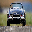

<Figure size 1440x144 with 0 Axes>

In [19]:
plt.figure(figsize = (20,2))
dashboard_image_1 

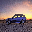

In [14]:
dashboard_image_2 = image.load_img('pexels-jonathan-petersson-995232.jpg', target_size=(32,32))
dashboard_image_2

In [417]:

test_image =image.img_to_array(dashboard_image_1) 
test_image =np.expand_dims(test_image, axis =0) 

result = model_7.predict(X_test) 
result[:5]

array([[3.96965333e-05, 1.05754443e-05, 1.17707496e-04, 8.50189328e-01,
        2.37899061e-04, 1.49121255e-01, 8.60456275e-05, 1.76979156e-04,
        7.14014095e-06, 1.34834027e-05],
       [2.96556557e-09, 4.50969129e-09, 2.50988060e-14, 5.87116402e-13,
        1.28083108e-11, 1.15327334e-16, 8.85410408e-12, 2.08148338e-17,
        1.00000000e+00, 7.41410128e-11],
       [4.58547671e-04, 1.13043636e-02, 4.10845278e-05, 6.04704022e-04,
        2.10431739e-04, 2.73827136e-05, 4.72057989e-04, 1.13033648e-05,
        9.84278023e-01, 2.59210216e-03],
       [4.75912311e-05, 5.42256530e-05, 2.37429117e-06, 2.59989774e-05,
        8.09947505e-06, 2.45592958e-07, 1.00751067e-05, 4.35865957e-08,
        9.99840498e-01, 1.08879713e-05],
       [7.07188214e-12, 1.78090354e-09, 3.32197601e-07, 1.30494664e-05,
        2.05287982e-08, 8.79611690e-08, 9.99986529e-01, 3.84480371e-13,
        1.46131512e-12, 1.45337797e-10]], dtype=float32)

In [425]:
y_classes = [np.argmax(element) for element in result]
y_classes

[3,
 8,
 8,
 8,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 2,
 4,
 9,
 4,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 3,
 9,
 8,
 4,
 1,
 9,
 5,
 4,
 6,
 3,
 6,
 0,
 9,
 3,
 8,
 7,
 2,
 9,
 8,
 7,
 3,
 8,
 8,
 7,
 3,
 5,
 3,
 7,
 5,
 2,
 3,
 5,
 4,
 1,
 2,
 5,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 0,
 3,
 5,
 8,
 8,
 8,
 1,
 7,
 2,
 5,
 5,
 3,
 8,
 9,
 0,
 3,
 8,
 6,
 4,
 6,
 6,
 2,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 5,
 6,
 8,
 7,
 4,
 0,
 2,
 2,
 1,
 3,
 0,
 4,
 2,
 7,
 8,
 3,
 1,
 2,
 8,
 2,
 8,
 3,
 3,
 2,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 6,
 5,
 6,
 5,
 8,
 0,
 6,
 5,
 3,
 2,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 3,
 4,
 2,
 1,
 3,
 6,
 8,
 2,
 8,
 0,
 5,
 0,
 9,
 6,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 2,
 2,
 3,
 8,
 6,
 3,
 2,
 0,
 5,
 8,
 0,
 1,
 7,
 2,
 8,
 8,
 7,
 8,
 5,
 8,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 3,
 8,
 5,
 9,
 8,
 0,
 7,
 9,
 8,
 2,
 7,
 3,
 9,
 5,
 3,
 9,
 3,
 4,
 5,
 5,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 9,
 5,
 5,
 1,
 1,
 8,
 9,
 0,
 3,
 1,
 8,
 2,
 2,


In [424]:
y_test[20:30]

array([[7],
       [0],
       [4],
       [9],
       [5],
       [2],
       [4],
       [0],
       [9],
       [6]], dtype=uint8)

In [13]:
y_train = y_train.shape(-1,)

TypeError: 'tuple' object is not callable

In [414]:
def display_pic(x, y, idx):
    plt.imshow(X[index])
    plt.xlabel(classes[])

array([126., 105.,  76., ..., 140., 133., 127.], dtype=float32)